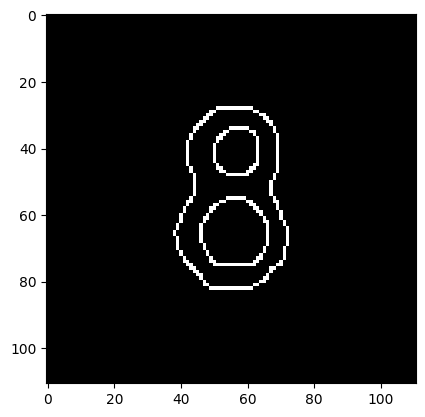

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math


def center_image(img1):
    #Image Centering

    hh = img1.shape[0]
    ww = img1.shape[1]


    # get contours (presumably just one around the nonzero pixels) 
    contours = cv2.findContours(img1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]
    for cntr in contours:
        x,y,w,h = cv2.boundingRect(cntr)

    # recenter
    startx = (ww - w)//2
    starty = (hh - h)//2
    result = np.zeros_like(img1)
    result[starty:starty+h,startx:startx+w] = img1  [y:y+h,x:x+w]
    return result




img1 = cv2.imread('NumberData/Number8/num2.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img1 = cv2.threshold(img1, 100, 255, cv2.THRESH_BINARY)
# plt.imshow(img1, cmap='gray')
img1 = center_image(img1[1])
plt.imshow(img1, cmap='gray')

x = img1.shape[0]
y = img1.shape[1]

## To draw horizontal lines

horizotal_lines = np.zeros_like(img1, dtype = np.uint8)

horizotal_lines = cv2.line(horizotal_lines, (0, 28), (x, 28), (255, 255, 255), 1)
horizotal_lines = cv2.line(horizotal_lines, (0, 42), (x, 42), (255, 255, 255), 1)
horizotal_lines = cv2.line(horizotal_lines, (0, 55), (x, 55), (255, 255, 255), 1)
horizotal_lines = cv2.line(horizotal_lines, (0, 69), (x, 69), (255, 255, 255), 1)
horizotal_lines = cv2.line(horizotal_lines, (0, 82), (x, 82), (255, 255, 255), 1)

## To draw vertical lines

vertical_lines = np.zeros_like(img1, dtype = np.uint8)

vertical_lines = cv2.line(vertical_lines, (28, 0), (28, y), (255, 255, 255), 1)
vertical_lines = cv2.line(vertical_lines, (42, 0), (42, y), (255, 255, 255), 1)
vertical_lines = cv2.line(vertical_lines, (55, 0), (55, y), (255, 255, 255), 1)
vertical_lines = cv2.line(vertical_lines, (69, 0), (69, y), (255, 255, 255), 1)
vertical_lines = cv2.line(vertical_lines, (82, 0), (82, y), (255, 255, 255), 1)


## Get Intersection points
horizontal_intersections = horizotal_lines & img1
vertical_intersections = vertical_lines & img1

horizontal_count = 0
vertical_count = 0

# new_img = horizotal_lines | vertical_lines | img1
# plt.imshow(new_img, cmap='gray')
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        if horizontal_intersections[i][j] > 230:
            horizontal_count += 1
        if vertical_intersections[i][j] > 230:
            vertical_count += 1


